In [1]:
import json
import io
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
def readDataFromJsonFile():
    try:
        with io.open('data.json', 'r', encoding='utf-8') as json_file:
            data = json.load(json_file)
            return data
    except json.decoder.JSONDecodeError as e:
        print(f"Error reading JSON file: {e}")

In [3]:
rawData = readDataFromJsonFile()

details_list = []
for key, value in rawData.items():
    details = value["details"]
    reviews = value["reviews"]
    details_list.append({
            "Movie Name": details["movie_Name"],
            "Genres": ", ".join(details["genre"]),
            "Other": ", ".join(details["other"]),
            "Reviews":reviews
    })

df = pd.DataFrame(details_list)
df = df.explode('Reviews')
print(df)

                  Movie Name                                        Genres  \
0   The Shawshank Redemption       Epic, Period Drama, Prison Drama, Drama   
0   The Shawshank Redemption       Epic, Period Drama, Prison Drama, Drama   
0   The Shawshank Redemption       Epic, Period Drama, Prison Drama, Drama   
0   The Shawshank Redemption       Epic, Period Drama, Prison Drama, Drama   
0   The Shawshank Redemption       Epic, Period Drama, Prison Drama, Drama   
..                       ...                                           ...   
24               City of God  Caper, Coming-of-Age, Gangster, Crime, Drama   
24               City of God  Caper, Coming-of-Age, Gangster, Crime, Drama   
24               City of God  Caper, Coming-of-Age, Gangster, Crime, Drama   
24               City of God  Caper, Coming-of-Age, Gangster, Crime, Drama   
24               City of God  Caper, Coming-of-Age, Gangster, Crime, Drama   

      Other                                            Reviews 

In [4]:
df[['Release_Year', 'Certificates']] = df['Other'].str.split(',', expand=True)
df.head()

,Movie Name,Genres,Other,Reviews,Release_Year,Certificates
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",It is no wonder that the film has such a high ...,1994,A
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",I'm trying to save you money; this is the last...,1994,A
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",This movie is not your ordinary Hollywood flic...,1994,A
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",I have never seen such an amazing film since I...,1994,A
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",The best movie in history and the best ending ...,1994,A


In [5]:
def clean_text(text):
    # removing HTML tags
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()

    #converting the text to lower
    text = re.sub(r'\W+', ' ', text.lower())

    #tokenizing the text
    stop_words = set(stopwords.words('english'))

    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]

    lemmatizer = WordNetLemmatizer()
    processed_Text = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    text = ' '.join(processed_Text)
    return text

df['Cleaned_Review'] = df['Reviews'].apply(clean_text)
df.head()

,Movie Name,Genres,Other,Reviews,Release_Year,Certificates,Cleaned_Review
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",It is no wonder that the film has such a high ...,1994,A,wonder film high rating quite literally breath...
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",I'm trying to save you money; this is the last...,1994,A,trying save money last film title consider bor...
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",This movie is not your ordinary Hollywood flic...,1994,A,movie ordinary hollywood flick great deep mess...
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",I have never seen such an amazing film since I...,1994,A,never seen amazing film since saw shawshank re...
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",The best movie in history and the best ending ...,1994,A,best movie history best ending entertainment b...


In [6]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  #between -1 and 1

df['Sentiment_Score'] = df['Cleaned_Review'].apply(analyze_sentiment)
df.head()

,Movie Name,Genres,Other,Reviews,Release_Year,Certificates,Cleaned_Review,Sentiment_Score
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",It is no wonder that the film has such a high ...,1994,A,wonder film high rating quite literally breath...,0.396000
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",I'm trying to save you money; this is the last...,1994,A,trying save money last film title consider bor...,0.220024
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",This movie is not your ordinary Hollywood flic...,1994,A,movie ordinary hollywood flick great deep mess...,0.305536
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",I have never seen such an amazing film since I...,1994,A,never seen amazing film since saw shawshank re...,0.326403
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",The best movie in history and the best ending ...,1994,A,best movie history best ending entertainment b...,1.000000


In [7]:
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment_Label'] = df['Sentiment_Score'].apply(get_sentiment_label)
df.head()

,Movie Name,Genres,Other,Reviews,Release_Year,Certificates,Cleaned_Review,Sentiment_Score,Sentiment_Label
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",It is no wonder that the film has such a high ...,1994,A,wonder film high rating quite literally breath...,0.396000,positive
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",I'm trying to save you money; this is the last...,1994,A,trying save money last film title consider bor...,0.220024,positive
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",This movie is not your ordinary Hollywood flic...,1994,A,movie ordinary hollywood flick great deep mess...,0.305536,positive
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",I have never seen such an amazing film since I...,1994,A,never seen amazing film since saw shawshank re...,0.326403,positive
0,The Shawshank Redemption,"Epic, Period Drama, Prison Drama, Drama","1994, A",The best movie in history and the best ending ...,1994,A,best movie history best ending entertainment b...,1.000000,positive


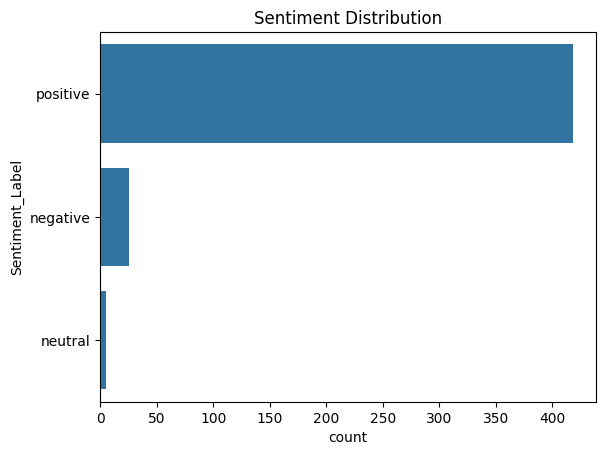

In [8]:
# Visualize sentiment distribution
# sns.cubehelix_palette(df['Sentiment_Label'])
sns.countplot(df['Sentiment_Label'])
plt.title("Sentiment Distribution")
plt.show()

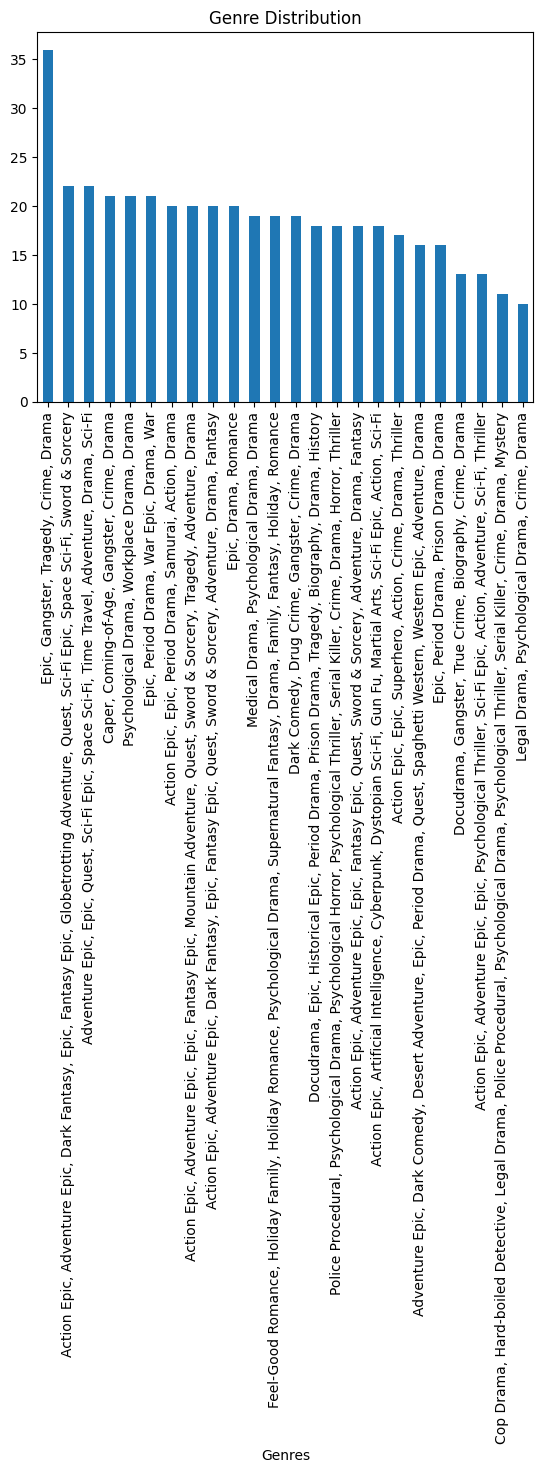

In [9]:
genre_counts = df['Genres'].explode().value_counts()
# print(genre_counts)
genre_counts.plot(kind='bar')
plt.title("Genre Distribution")
plt.show()

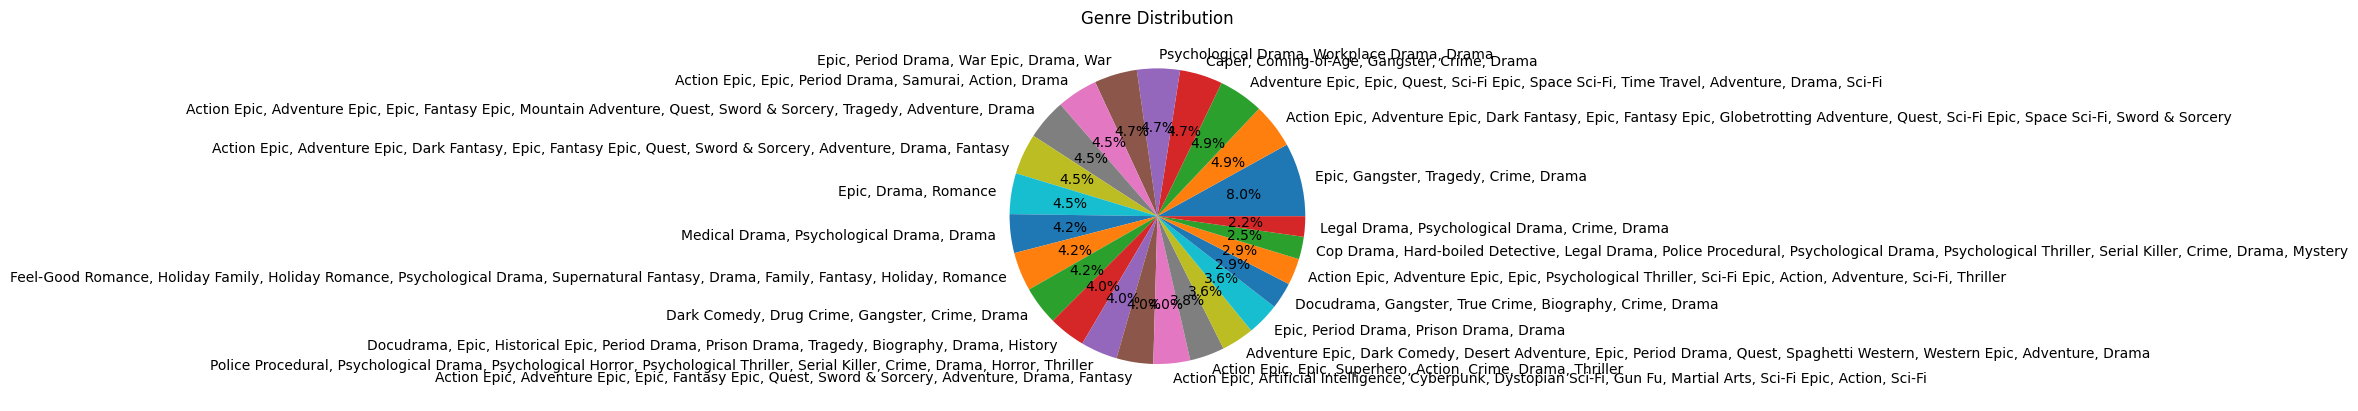

In [10]:
genre_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Genre Distribution")
plt.ylabel('')
plt.show()


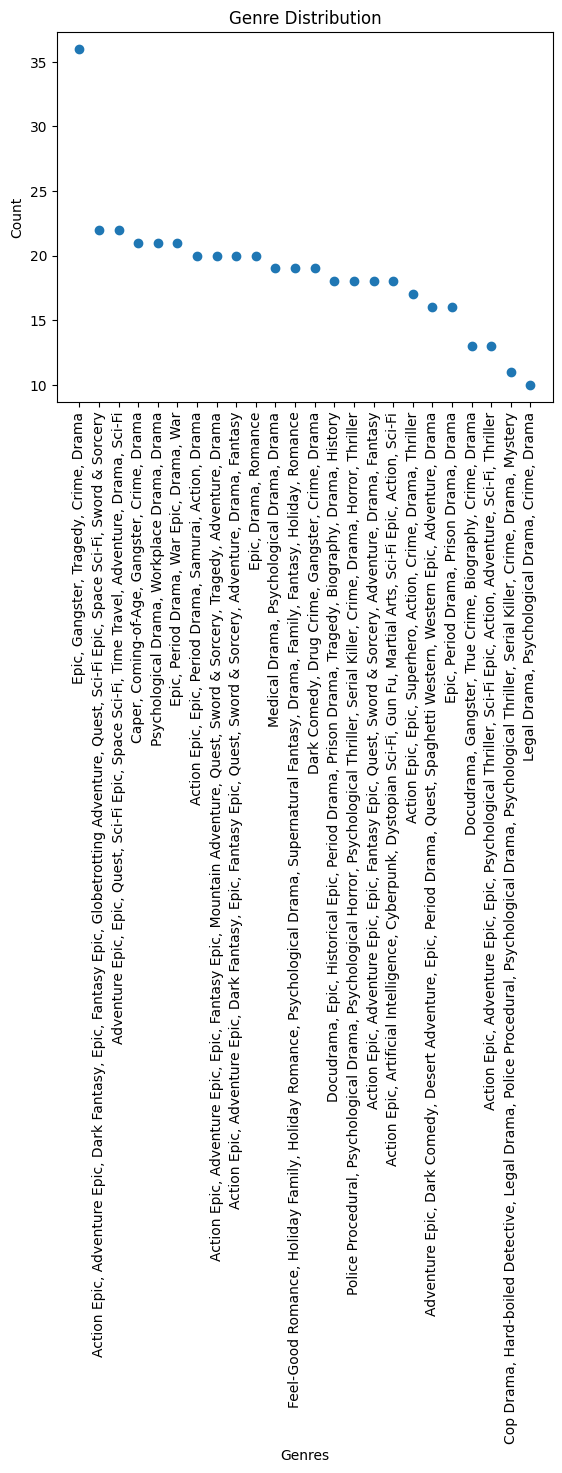

In [11]:
plt.scatter(genre_counts.index, genre_counts.values)
plt.title("Genre Distribution")
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [12]:
sentiment_counts = df.groupby(['Release_Year', 'Sentiment_Label']).size().unstack(fill_value=0)
print(sentiment_counts)


Sentiment_Label  negative  neutral  positive
Release_Year                                
1946                    1        0        18
1954                    1        0        19
1957                    1        1         8
1966                    2        0        14
1972                    2        0        15
1974                    0        0        19
1975                    0        0        19
1980                    1        0        21
1990                    1        0        12
1991                    2        0        16
1993                    2        0        16
1994                    2        1        52
1995                    0        0        11
1998                    3        0        18
1999                    0        2        37
2001                    1        0        17
2002                    5        0        36
2003                    1        0        19
2008                    0        0        17
2010                    0        0        13
2014      

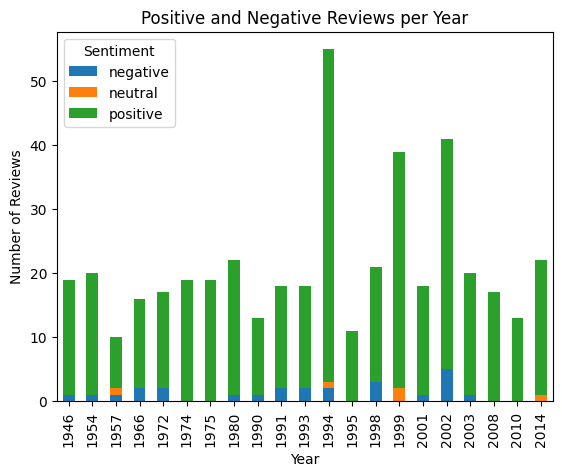

In [13]:
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', stacked=True)
plt.title("Positive and Negative Reviews per Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment", loc="upper left")
plt.show()


In [14]:
# Sentiment classification using Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Review'], df['Sentiment_Label'], test_size=0.2, random_state=40)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)
print(f'Accuracy: {accuracy_score(y_test, predictions)}')


['positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'posit

In [ ]:
from imblearn.combine import SMOTEENN # SMOTEENN is a combination of over- and under-sampling
from imblearn.over_sampling import SMOTE # SMOTE is an over-sampling technique
 
# Create an instance of SMOTE with the desired parameters
smote = SMOTE(k_neighbors=2) #This means that for each minority class sample, SMOTE will find its 2 nearest neighbors. It will then create synthetic samples
# Pass the SMOTE instance to the smote parameter of SMOTEENN
smote_enn = SMOTEENN(smote=smote)


X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)




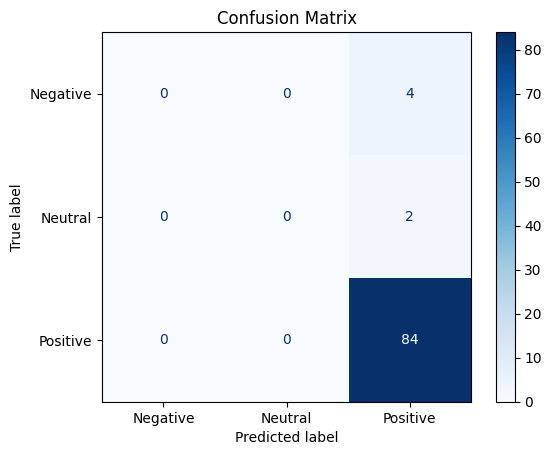

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral','Positive'])
disp.plot(cmap=plt.cm.Blues)

# Add title
plt.title("Confusion Matrix")
plt.show()


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Review'], df['Sentiment_Label'], test_size=0.2, random_state=40)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=40)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)
print(predictions)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


['positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'posit

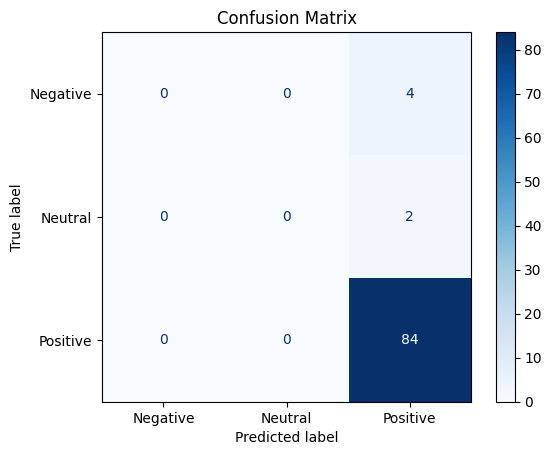

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral','Positive'])
disp.plot(cmap=plt.cm.Blues)

# Add title
plt.title("Confusion Matrix")
plt.show()
